In [16]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('Nairobi_property_data.csv')

In [18]:
df.head()

,title,location,price,agent
0,Commercial Land,The Hub Karen,255000000,crystal-valuers-ltd
1,3 Bedroom Townhouse,Kiambu Road,35250000,ams-properties-limited
2,2 Bedroom Flat & Apartment,Kindaruma Road,6600000,premium-properties
3,4 Bedroom Flat & Apartment,Lavington,34000000,bright-homes-management
4,4 Bedroom Townhouse,Runda,27450000,palmier-properties-limited


In [19]:
df['price'] = df['price'].astype(float)

In [20]:
df.describe()

,price
count,3616.00
mean,65000134.14
std,183039942.28
min,0.00
25%,13000000.00
50%,23500000.00
75%,65000000.00
max,7500000000.00


In [21]:
# dropping duplicates if any in the dataset

df=df.drop_duplicates()


In [22]:
df.shape

(3363, 4)

In [25]:
#aggregate per the property title and compute the mean , max , min and count per group
agg_title_df = df.groupby('title').agg({'price':['count','mean','max','min']})
agg_title_df.columns = ["_".join(x) for x in agg_title_df.columns.ravel()]
agg_title_df= agg_title_df.reset_index()

In [26]:
agg_title_df.head()

,title,price_count,price_mean,price_max,price_min
0,2 Bedroom Flat & Apartment,1,10150000.00,10150000.00,10150000.00
1,3 Bedroom Flat & Apartment,2,14500000.00,19500000.00,9500000.00
2,4 Bedroom Flat & Apartment,1,25000000.00,25000000.00,25000000.00
3,4 Bedroom House,1,35000000.00,35000000.00,35000000.00
4,Commercial Land,1,793000000.00,793000000.00,793000000.00


In [28]:
#sorting the properties in descending order
agg_title_df_sorted = agg_title_df.sort_values(by='price_count', ascending = False)

In [30]:
print(agg_title_df_sorted.shape)
agg_title_df_sorted.head()

(61, 5)


,title,price_count,price_mean,price_max,price_min
13,3 Bedroom Flat & Apartment,837,18664691.88,55000000.00,65000.00
8,2 Bedroom Flat & Apartment,435,14563152.10,675000000.00,0.00
21,4 Bedroom Flat & Apartment,274,29555620.43,245000000.00,0.00
54,Land,238,148214885.53,1500000000.00,0.00
33,5 Bedroom Townhouse,194,83136030.93,300000000.00,28000000.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

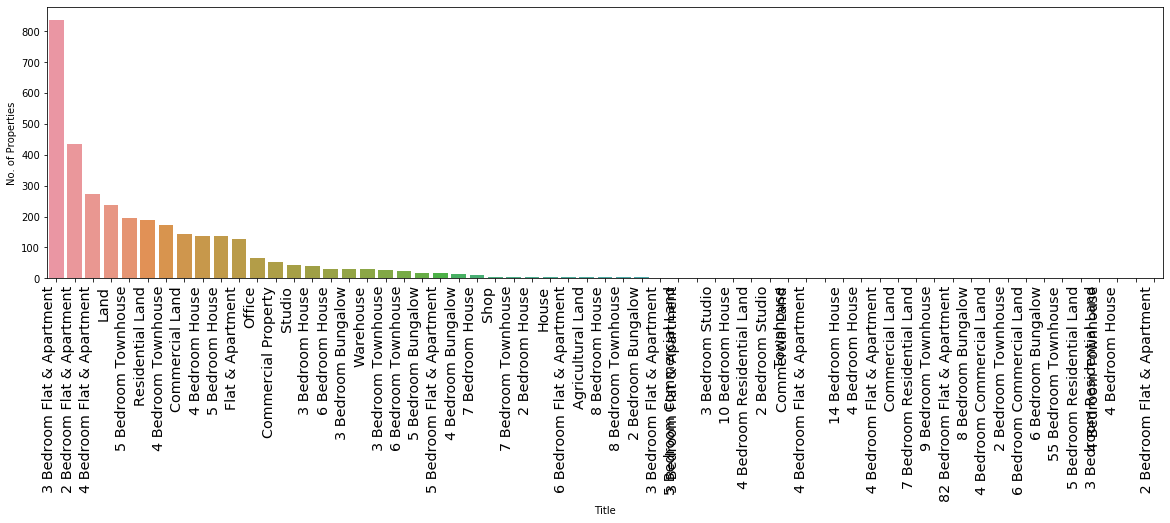

In [33]:
plt.figure(figsize=(20,5))
#sns.set(style="whitegrid")
ax = sns.barplot(x="title", y="price_count", data=agg_title_df_sorted)
ax.set(xlabel='Title', ylabel='No. of Properties')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)